<a href="https://colab.research.google.com/github/deepak-0104/Vehicle-Routing-Problem/blob/main/Vehicle_Routing_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries



In [2]:
#SOLUTION
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 3.0 MB/s eta 0:00:00


In [13]:
#SOLUTION

num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [14]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [15]:
#SOLUTION CODE


#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [16]:
#SOLUTION

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [6]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min   
0  	300   	648.846	1.2615
1  	213   	631.264	1.2615
2  	243   	618.33 	2.73272
3  	232   	605.975	1.98853
4  	233   	602.509	1.98853
5  	218   	597.058	1.98853
6  	213   	587.863	0.974248
7  	233   	580.3  	4.6494  
8  	219   	574.687	2.88646 
9  	209   	564.339	3.45755 
10 	224   	559.153	5.70128 
11 	230   	555.882	4.21431 
12 	230   	543.347	5.94329 
13 	217   	521.408	2.75175 
14 	231   	503.163	2.75175 
15 	250   	486.726	4.65508 
16 	238   	474.51 	2.33854 
17 	236   	466.44 	6.6035  
18 	225   	460.717	10.0386 
19 	225   	453.62 	2.88191 
20 	209   	443.681	2.88191 
21 	232   	441.749	2.88191 
22 	237   	435.695	2.44412 
23 	217   	435.175	2.70049 
24 	227   	425.737	2.70049 
25 	246   	418.921	4.15575 
26 	233   	405.209	2.88191 
27 	219   	395.229	13.4261 
28 	229   	390.115	5.22482 
29 	223   	384.506	17.957  
30 	238   	382.261	10.8782 
31 	225   	375.104	19.5613 
32 	221   	376.452	14.1742 
33 	243   	368.576	4.80479 
34 	232   	365.288	11.7314 
35

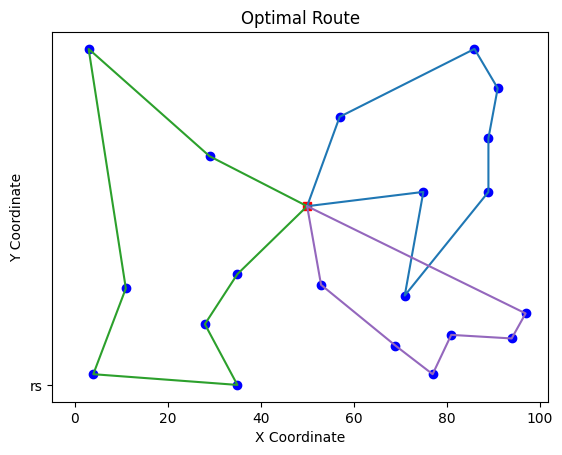

In [17]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [ ]:
# Additional Tasks for the Vehicle Routing Project (Optional but highly recommended)

# 1. Parameter Tuning:
# Task: Vary parameters like population size, mutation rate, or tournament size. Analyze their impact on the results.
# Purpose: Learn the importance of parameter tuning in genetic algorithms and how it affects outcomes.

# 2. Fitness Score Analysis Over Generations:
# Task: Plot the fitness score of the best individual over generations for different configurations.
# Purpose: Visualize and understand the convergence behavior of the algorithm under different settings.

# 3. Solution Diversity Analysis:
# Task: Implement a method to measure and report the diversity of solutions in the population over time.
# Purpose: Explore the balance between exploration and exploitation in genetic algorithms.